## Import Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC
from sklearn.metrics import roc_curve, auc
import os

## Import Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'network-intrusion-dataset' dataset.
Path to dataset files: /kaggle/input/network-intrusion-dataset


In [ ]:
f1 = pd.read_csv('/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
f2 = pd.read_csv('/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
f3 = pd.read_csv('/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv')
f4 = pd.read_csv('/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv')
f5 = pd.read_csv('/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
f6 = pd.read_csv('/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
f7 = pd.read_csv('/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv')
f8 = pd.read_csv('/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv')

In [ ]:
combine_df = pd.concat([f1], ignore_index=True)

In [ ]:
combine_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Pre-processing

In [ ]:
encoder = LabelEncoder()
combine_df[' Label']= encoder.fit_transform(combine_df[' Label'])

In [ ]:
combine_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
df = combine_df.fillna(0)  # Replace NaN with 0
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
# Check for NaNs
nan_mask = df.isna()
print("NaNs in DataFrame:\n", df[nan_mask].sum())

# Check for infinities
inf_mask = df.isin([np.inf, -np.inf])
print("Infs in DataFrame:\n", df[inf_mask].sum())

NaNs in DataFrame:
  Destination Port              0.0
 Flow Duration                 0.0
 Total Fwd Packets             0.0
 Total Backward Packets        0.0
Total Length of Fwd Packets    0.0
                              ... 
Idle Mean                      0.0
 Idle Std                      0.0
 Idle Max                      0.0
 Idle Min                      0.0
 Label                         0.0
Length: 79, dtype: float64
Infs in DataFrame:
  Destination Port              0.0
 Flow Duration                 0.0
 Total Fwd Packets             0.0
 Total Backward Packets        0.0
Total Length of Fwd Packets    0.0
                              ... 
Idle Mean                      0.0
 Idle Std                      0.0
 Idle Max                      0.0
 Idle Min                      0.0
 Label                         0.0
Length: 79, dtype: float64


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
df.fillna(0, inplace=True)  # Replace NaNs with 0

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
df.dropna(inplace=True)  # Drop rows with NaNs

In [ ]:
df.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [ ]:
df=df.astype(int)
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
1,55054,109,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
2,55055,52,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
3,46236,34,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
4,54863,3,2,0,12,0,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
225741,61378,72,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
225742,61375,75,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
225743,61323,48,2,0,12,0,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(' Label',axis=1)
y = df[' Label']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 2.32783109, -0.51521027, -0.18640643, ..., -0.28313719,
        -0.47836378, -0.39107132],
       [ 2.33739848, -0.51520691, -0.25124533, ..., -0.28313719,
        -0.47836378, -0.39107132],
       [ 2.3374491 , -0.51520872, -0.25124533, ..., -0.28313719,
        -0.47836378, -0.39107132],
       ...,
       [ 2.65737453, -0.51520799, -0.25124533, ..., -0.28313719,
        -0.47836378, -0.39107132],
       [ 2.65474223, -0.51520885, -0.18640643, ..., -0.28313719,
        -0.47836378, -0.39107132],
       [ 2.65489409, -0.51520821, -0.25124533, ..., -0.28313719,
        -0.47836378, -0.39107132]])

In [ ]:
# Impute missing values (replace NaNs with the mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Determine the number of columns (features) in your DataFrame
num_columns = df.shape[1]

# Set an appropriate value for k (less than or equal to the number of columns)
k = min(10, num_columns)  # Adjust this as needed

# Initialize SelectKBest with the scoring function
k_best = SelectKBest(score_func=f_classif, k=k)

# Fit and transform the imputed data to select the top 10 features
X_new = k_best.fit_transform(X_imputed, y)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [31 32 33 49 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# Get the boolean mask of selected features
selected_features_mask = k_best.get_support()
selected_features_mask

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
elected_feature_names = X.columns[selected_features_mask]
elected_feature_names

Index([' Destination Port', 'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Min Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' URG Flag Count', ' Average Packet Size',
       ' Avg Bwd Segment Size'],
      dtype='object')

In [ ]:
new_columns=[' Destination Port', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packets/s', ' Min Packet Length',
       ' PSH Flag Count', ' URG Flag Count', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' min_seg_size_forward']

In [ ]:
df_new=X[new_columns]
df_new

,Destination Port,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packets/s,Min Packet Length,PSH Flag Count,URG Flag Count,Avg Fwd Segment Size,Avg Bwd Segment Size,min_seg_size_forward
0,54865,0,0,0,6,0,0,6,0,20
1,55054,6,6,9174,6,0,1,6,6,20
2,55055,6,6,19230,6,0,1,6,6,20
3,46236,6,6,29411,6,0,1,6,6,20
4,54863,0,0,0,6,0,0,6,0,20
...,...,...,...,...,...,...,...,...,...,...
225740,61374,6,6,16393,6,0,1,6,6,20
225741,61378,6,6,13888,6,0,1,6,6,20
225742,61375,6,6,13333,6,0,1,6,6,20
225743,61323,0,0,0,6,0,0,6,0,20


In [ ]:
df_new['label']=df[' Label']
df_new['label']

/tmp/ipython-input-1275674953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label']=df[' Label']


,label
0,0
1,0
2,0
3,0
4,0
...,...
225740,0
225741,0
225742,0
225743,0


## EDA

In [ ]:
df_new.columns

Index([' Destination Port', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packets/s', ' Min Packet Length',
       ' PSH Flag Count', ' URG Flag Count', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' min_seg_size_forward', 'label'],
      dtype='object')

In [ ]:
# Mengatur style untuk plot
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ==============================================================================
# 1. SETUP & FILTERING
# ==============================================================================
print("--- 1. Setup & Filtering ---")

# Daftar 10 fitur yang Anda pilih (dengan potensi spasi di depan)
# Correctly assign the column names to feature_list
feature_list = df_new.columns.tolist()
feature_list.remove('label') # Remove the target column from the feature list
if 'is_attack' in feature_list:
    feature_list.remove('is_attack')


# Kita juga perlu target variable
target_col = 'label' # Corrected target column name

# 1. Bersihkan nama kolom di DataFrame utama (df_new)
df_new.columns = df_new.columns.str.strip()

# 2. Bersihkan nama di daftar fitur Anda
clean_feature_list = [col.strip() for col in feature_list]
clean_target_col = target_col.strip()

# 3. Buat daftar final kolom untuk EDA (fitur + target)
eda_columns = clean_feature_list + [clean_target_col]

# 4. Filter DataFrame utama untuk EDA
#    (Kita cek dulu apakah semua kolom ada)
existing_eda_columns = [col for col in eda_columns if col in df_new.columns]
df_eda = df_new[existing_eda_columns].copy()

# 5. Buat kolom target biner 'is_attack' (jika belum ada)
if 'is_attack' not in df_eda.columns:
    # Correct the condition for creating 'is_attack' since 'label' is already encoded
    df_eda['is_attack'] = (df_eda[clean_target_col] != 0).astype(int) # Assuming 0 is BENIGN


# 6. Pastikan tidak ada nilai infinity/NaN
df_eda.replace([np.inf, -np.inf], np.nan, inplace=True)
df_eda.dropna(inplace=True)

print(f"DataFrame EDA dibuat dengan shape: {df_eda.shape}")
print(f"Fitur yang dianalisis: {clean_feature_list}")
print("-" * 30, "\n")

--- 1. Setup & Filtering ---
DataFrame EDA dibuat dengan shape: (225745, 12)
Fitur yang dianalisis: ['Destination Port', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packets/s', 'Min Packet Length', 'PSH Flag Count', 'URG Flag Count', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'min_seg_size_forward']
------------------------------ 



--- 2. Analisis 'Destination Port' & 'URG Flag Count' ---


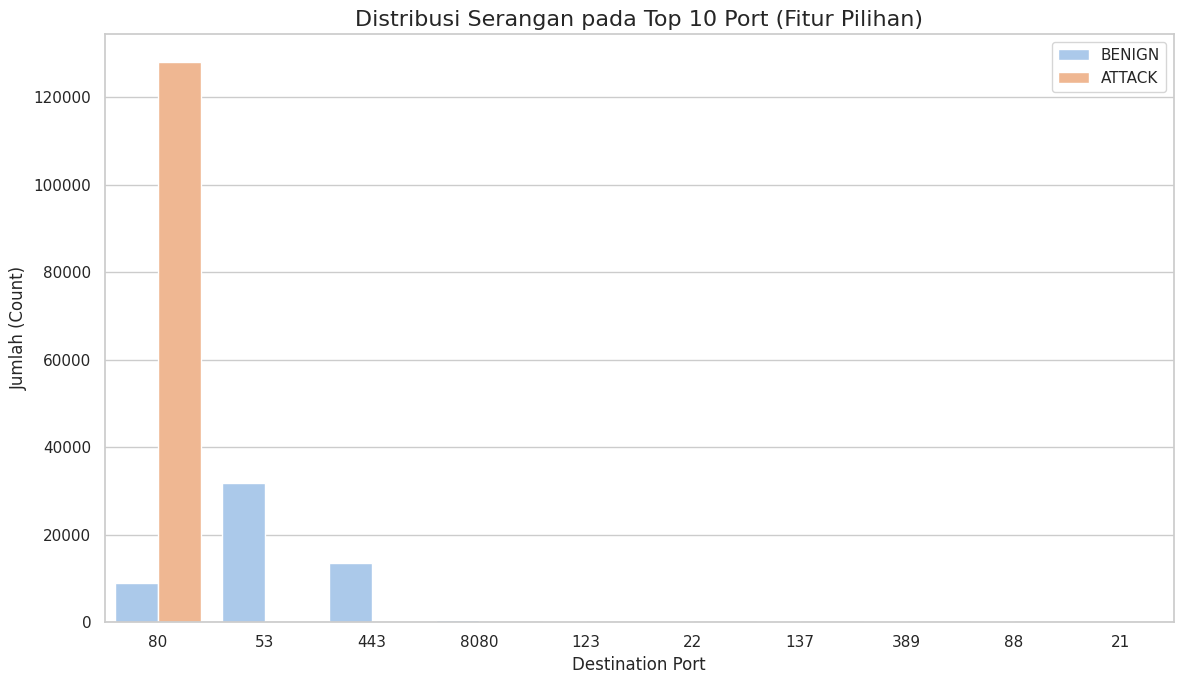

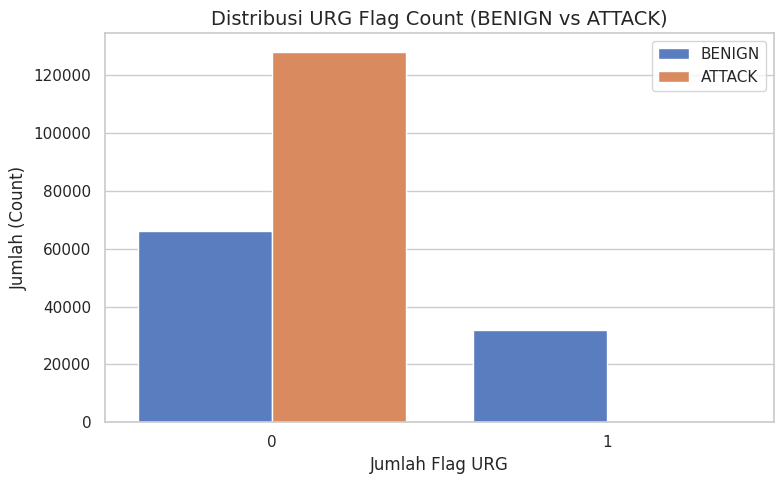

In [ ]:
# ==============================================================================
# 2. ANALISIS FITUR KATEGORIKAL & FLAG
# ==============================================================================
print("--- 2. Analisis 'Destination Port' & 'URG Flag Count' ---")

# --- Fitur 1: Destination Port ---
plt.figure(figsize=(12, 7))
# Ambil 10 port teratas DARI DATA YANG SUDAH DIFILTER
top_ports_eda = df_eda['Destination Port'].value_counts().head(10).index

sns.countplot(
    x='Destination Port',
    data=df_eda[df_eda['Destination Port'].isin(top_ports_eda)],
    hue='is_attack',
    order=top_ports_eda,
    palette='pastel'
)
plt.title('Distribusi Serangan pada Top 10 Port (Fitur Pilihan)', fontsize=16)
plt.xlabel('Destination Port')
plt.ylabel('Jumlah (Count)')
plt.legend(['BENIGN', 'ATTACK'])
plt.tight_layout()
plt.show()
# Insight: Plot ini mengkonfirmasi apakah 'Destination Port' penting
# karena serangan menargetkan port tertentu yang berbeda dari traffic normal.

# --- Fitur 2: URG Flag Count ---
plt.figure(figsize=(8, 5))
sns.countplot(x='URG Flag Count', data=df_eda, hue='is_attack', palette='muted')
plt.title('Distribusi URG Flag Count (BENIGN vs ATTACK)', fontsize=14)
plt.xlabel('Jumlah Flag URG')
plt.ylabel('Jumlah (Count)')
plt.legend(['BENIGN', 'ATTACK'])
plt.tight_layout()
plt.show()
# Insight: 'URG Flag Count' kemungkinan besar hampir selalu 0.
# Fakta bahwa fitur ini TERPILIH berarti bahwa nilai (mungkin 1)
# sangat berkorelasi dengan salah satu jenis serangan.

--- 3. Analisis Statistik Ukuran Paket ---
Melewati Packet Length Mean, tidak ditemukan.
Melewati Packet Length Std, tidak ditemukan.


/tmp/ipython-input-107670629.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-107670629.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['BENIGN', 'ATTACK'])
/tmp/ipython-input-107670629.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-107670629.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['BENIGN', 'ATTACK'])


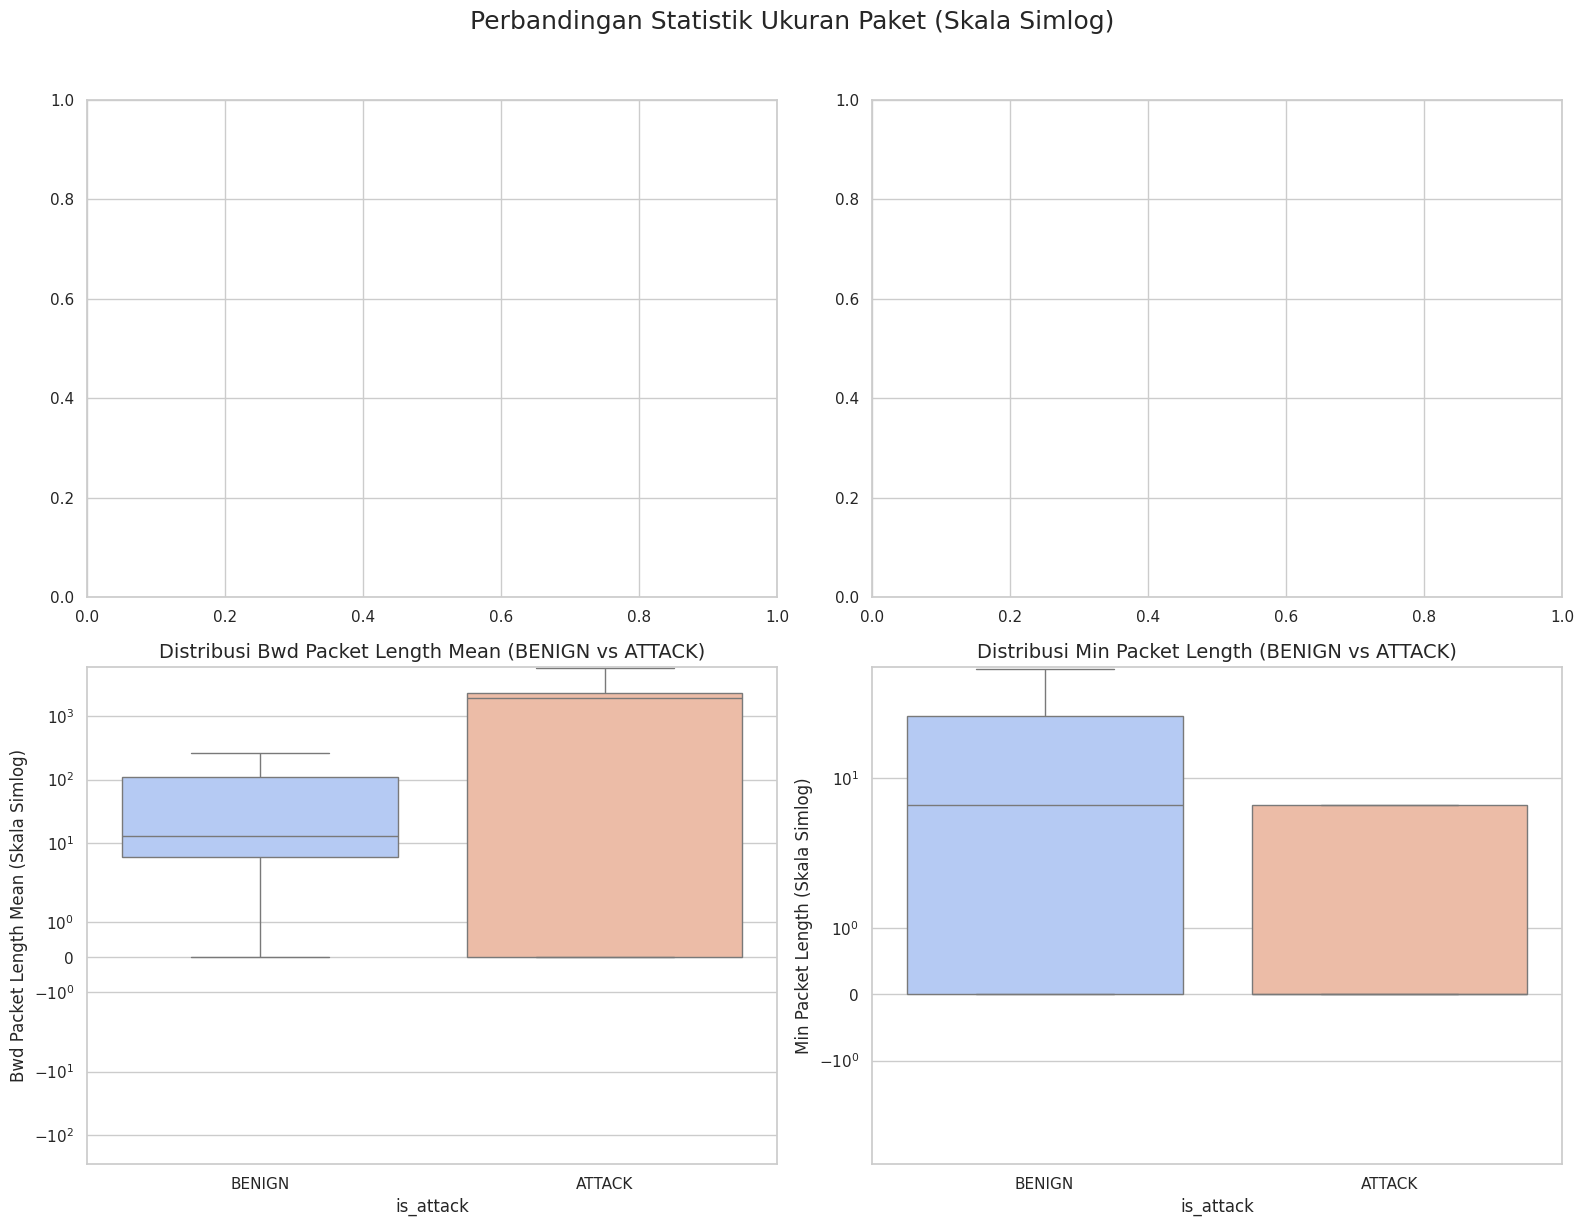

In [ ]:
# ==============================================================================
# 3. ANALISIS STATISTIK UKURAN PAKET
# ==============================================================================
print("--- 3. Analisis Statistik Ukuran Paket ---")

# Kita akan plot 4 fitur statistik ukuran paket yang paling representatif
size_stats_features = [
    'Packet Length Mean',
    'Packet Length Std',
    'Bwd Packet Length Mean',
    'Min Packet Length'
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten() # Ubah jadi array 1D agar mudah di-loop

for i, feature in enumerate(size_stats_features):
    if feature not in df_eda.columns:
        print(f"Melewati {feature}, tidak ditemukan.")
        continue

    sns.boxplot(
        x='is_attack',
        y=feature,
        data=df_eda,
        ax=axes[i],
        palette='coolwarm',
        showfliers=False # Sangat PENTING, karena outlier akan merusak plot
    )
    axes[i].set_title(f'Distribusi {feature} (BENIGN vs ATTACK)', fontsize=14)
    axes[i].set_yscale('symlog') # Gunakan 'symlog' untuk menangani nilai 0
    axes[i].set_xticklabels(['BENIGN', 'ATTACK'])
    axes[i].set_ylabel(f'{feature} (Skala Simlog)')

plt.suptitle('Perbandingan Statistik Ukuran Paket (Skala Simlog)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()
# Insight: Ini adalah inti dari deteksi.
# - 'Packet Length Std' (Std Dev): Jika = 0, artinya semua paket berukuran sama,
#   ini adalah ciri-ciri serangan flood. Kita ekspektasi 'ATTACK' punya Std yg rendah.
# - 'Packet Length Mean': Serangan DDoS mungkin menggunakan paket yang sangat kecil
#   (untuk memaksimalkan jumlah) atau sangat besar (untuk saturasi bandwidth).
#   Kita akan lihat perbedaannya dengan BENIGN.

--- 4. Analisis Korelasi & Redundansi Fitur ---
Mengecek apakah ada fitur yang sangat mirip...

Korelasi 'Bwd Packet Length Mean' vs 'Avg Bwd Segment Size': 1.0000

Membuat Heatmap Korelasi...


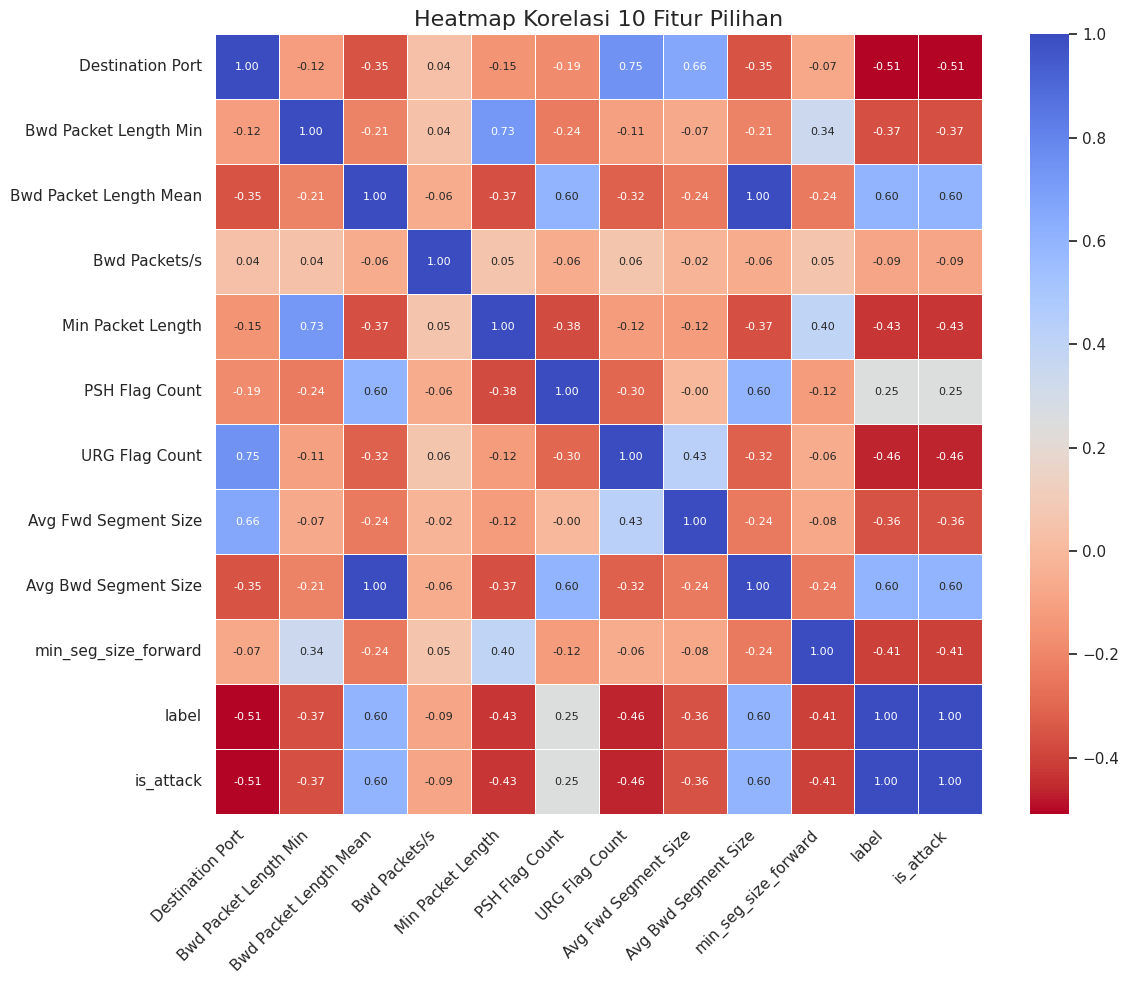

--- EDA Selesai ---


In [ ]:
# ==============================================================================
# 4. ANALISIS KORELASI & REDUNDANSI FITUR
# ==============================================================================
print("--- 4. Analisis Korelasi & Redundansi Fitur ---")
print("Mengecek apakah ada fitur yang sangat mirip...\n")

# Kita perlu mengecek hipotesis redundansi kita
# 1. 'Packet Length Mean' vs 'Average Packet Size'
# 2. 'Bwd Packet Length Mean' vs 'Avg Bwd Segment Size'

try:
    corr2 = df_eda['Bwd Packet Length Mean'].corr(df_eda['Avg Bwd Segment Size'])
    print(f"Korelasi 'Bwd Packet Length Mean' vs 'Avg Bwd Segment Size': {corr2:.4f}")
except KeyError as e:
    print(f"Gagal menghitung korelasi: {e}")

print("\nMembuat Heatmap Korelasi...")

# Buat heatmap dari semua 10 fitur
plt.figure(figsize=(12, 10))
corr_matrix = df_eda.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm_r',
    linewidths=0.5,
    annot_kws={"size": 8}
)
plt.title('Heatmap Korelasi 10 Fitur Pilihan', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Insight:
# Jika korelasi (corr1, corr2) > 0.99, artinya fitur-fitur tersebut
# pada dasarnya adalah DUPLIKAT. Anda harus MENGHAPUS salah satunya
# (misal: hapus 'Average Packet Size' dan 'Avg Bwd Segment Size')
# untuk menghindari multikolinearitas pada model Anda.

print("--- EDA Selesai ---")

# Features Engineering

In [ ]:
df_final = df.copy()
# Pastikan tidak ada spasi di nama kolom
df_final.columns = df_final.columns.str.strip()

# Ide 1: Kategorisasi Port
df_final['is_well_known_port'] = (df_final['Destination Port'] < 1024).astype(int)

# Ide 2: Rasio Asimetri
# Tambahkan 1e-6 (epsilon) untuk menghindari error pembagian dengan nol
epsilon = 1e-6
df_final['fwd_bwd_segment_ratio'] = df_final['Avg Fwd Segment Size'] / (df_final['Avg Bwd Segment Size'] + epsilon)

# Ide 3: Konsistensi Ukuran Paket
df_final['bwd_packet_consistency'] = df_final['Bwd Packet Length Mean'] - df_final['Bwd Packet Length Min']

# Ide 4: Kombinasi Flag
df_final['total_uncommon_flags'] = df_final['PSH Flag Count'] + df_final['URG Flag Count']


# Sekarang lihat fitur-fitur baru Anda
display(df_final)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,is_well_known_port,fwd_bwd_segment_ratio,bwd_packet_consistency,total_uncommon_flags
0,54865,3,2,0,12,0,6,6,6,0,...,0,0,0,0,0,0,0,6000000.0,0,0
1,55054,109,1,1,6,6,6,6,6,0,...,0,0,0,0,0,0,0,1.0,0,1
2,55055,52,1,1,6,6,6,6,6,0,...,0,0,0,0,0,0,0,1.0,0,1
3,46236,34,1,1,6,6,6,6,6,0,...,0,0,0,0,0,0,0,1.0,0,1
4,54863,3,2,0,12,0,6,6,6,0,...,0,0,0,0,0,0,0,6000000.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6,0,...,0,0,0,0,0,0,0,1.0,0,1
225741,61378,72,1,1,6,6,6,6,6,0,...,0,0,0,0,0,0,0,1.0,0,1
225742,61375,75,1,1,6,6,6,6,6,0,...,0,0,0,0,0,0,0,1.0,0,1
225743,61323,48,2,0,12,0,6,6,6,0,...,0,0,0,0,0,0,0,6000000.0,0,0


# Model Selection (text)
# Model Training

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Memisahkan fitur (X) dan variabel target (y) dari df_new
X1 = df_new.drop('label', axis=1)
y1 = df_new['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

## LR Model

In [ ]:
LR_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=2000, solver='lbfgs'))
])

# Train the model
LR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=2000))])

In [ ]:
LR_y_pred = LR_pipeline.predict(X_test)
LR_y_prob = LR_pipeline.decision_function(X_test)

In [ ]:
LR_report = classification_report(y_test, LR_y_pred)
print("Classification Report:", LR_report)

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.95      0.97     19405
           1       0.96      1.00      0.98     25744

    accuracy                           0.98     45149
   macro avg       0.98      0.97      0.98     45149
weighted avg       0.98      0.98      0.98     45149



In [ ]:
LR_roc_auc = roc_auc_score(y_test, LR_y_prob)
print(f'ROC-AUC Score: {LR_roc_auc:.2f}')

ROC-AUC Score: 1.00


In [ ]:
LR_conf_matrix = confusion_matrix(y_test, LR_y_pred)
df_conf_matrix = pd.DataFrame(LR_conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Logistic Regresion Confusion Matrix:")
print(df_conf_matrix)

Logistic Regresion Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               18357                1048
Actual Positive                  11               25733


## Random Forest

In [ ]:
RF_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
RF_pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Predict class labels
rf_y_pred = RF_pipeline.predict(X_test)

# Predict probabilities for ROC-AUC
rf_y_prob = RF_pipeline.predict_proba(X_test)[:, 1]  # Assuming binary classification; for multiclass, adjust accordingly

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19405
           1       0.99      1.00      1.00     25744

    accuracy                           0.99     45149
   macro avg       1.00      0.99      0.99     45149
weighted avg       0.99      0.99      0.99     45149



In [ ]:
# ROC-AUC Score
rf_roc_auc = roc_auc_score(y_test, rf_y_prob)
print(f'ROC-AUC Score: {rf_roc_auc:.2f}')

ROC-AUC Score: 1.00


In [ ]:
# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
df_conf_matrix = pd.DataFrame(rf_conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Random Forest Confusion Matrix:")
print(df_conf_matrix)


Random Forest Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               19162                 243
Actual Positive                   3               25741


## Deep Neural Network

In [ ]:
dnn_model = Sequential()
dnn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))  # For binary classification; use 'softmax' for multiclass

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback: berhenti dini dan rollback ke hasil terbaik
early_stop = EarlyStopping(
    monitor='val_loss',        # pantau metrik validasi
    patience=5,                # hentikan jika tidak membaik setelah 5 epoch
    restore_best_weights=True  # rollback ke bobot terbaik
)

# Latih model dengan callback
history = dnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]     # tambahkan callback di sini
)

Epoch 1/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9626 - auc_1: 0.9719 - loss: 9.9357 - val_accuracy: 0.9931 - val_auc_1: 0.9967 - val_loss: 0.8976
Epoch 2/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9901 - auc_1: 0.9927 - loss: 0.7827 - val_accuracy: 0.9931 - val_auc_1: 0.9968 - val_loss: 1.7964
Epoch 3/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9922 - auc_1: 0.9953 - loss: 0.5159 - val_accuracy: 0.9922 - val_auc_1: 0.9955 - val_loss: 0.7356
Epoch 4/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9922 - auc_1: 0.9953 - loss: 0.2505 - val_accuracy: 0.9929 - val_auc_1: 0.9967 - val_loss: 0.3867
Epoch 5/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9928 - auc_1: 0.9969 - loss: 0.0584 - val_accuracy: 0.9930 - val_auc_1: 0.9973 - val_loss: 0.0806
Epoch 6/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9931 - auc_1: 0.9969 - loss: 0.0396 - val_accuracy: 0.9929 - val_auc_1: 0.9971 - val_loss: 0.088

In [ ]:
best_epoch = early_stop.stopped_epoch - early_stop.patience + 1
print(f"Model terbaik dicapai pada epoch ke-{best_epoch}")

Model terbaik dicapai pada epoch ke-4


In [ ]:
# Generate predictions
dnn_y_pred = (dnn_model.predict(X_test) > 0.5).astype(int)
dnn_y_prob = dnn_model.predict(X_test).ravel()  # Flatten array for binary classification

1411/1411 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dnn_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19405
           1       0.99      1.00      0.99     25744

    accuracy                           0.99     45149
   macro avg       0.99      0.99      0.99     45149
weighted avg       0.99      0.99      0.99     45149



In [ ]:
# ROC-AUC Score
dnn_roc_auc = roc_auc_score(y_test, dnn_y_prob)
print(f'ROC-AUC Score: {dnn_roc_auc:.2f}')

ROC-AUC Score: 1.00


In [ ]:
dnn_conf_matrix = confusion_matrix(y_test, dnn_y_pred)
df_conf_matrix = pd.DataFrame(dnn_conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Deep learning Confusion Matrix:")
print(df_conf_matrix)

Deep learning Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               19147                 258
Actual Positive                  31               25713


## Evaluation

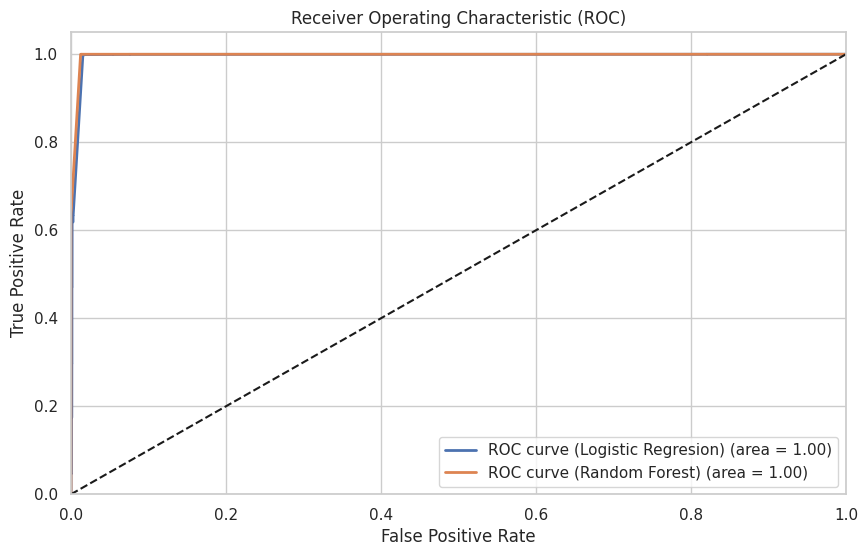

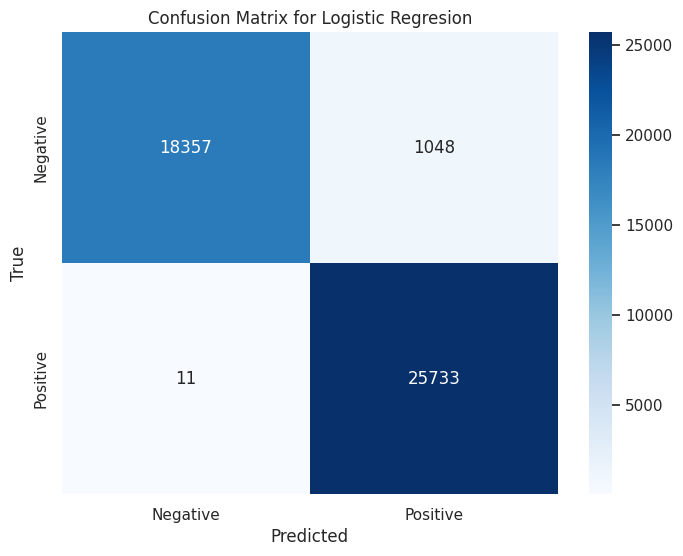

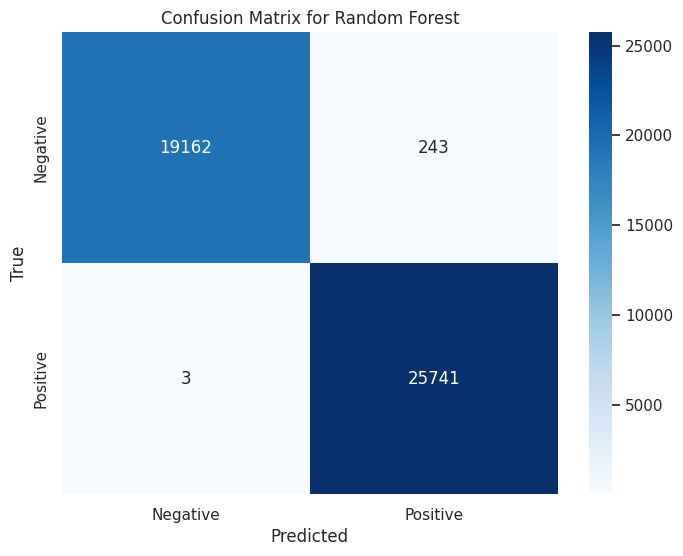

In [ ]:
# Define predictions and true values (Replace these with your actual data)
models_pipelines = {
    'Logistic Regresion': LR_pipeline,
    'Random Forest': RF_pipeline
}

# Use the predicted probabilities from the trained models
y_probs = {
    'Logistic Regresion': LR_y_prob,
    'Random Forest': rf_y_prob
}

# Plot ROC Curves
def plot_roc_curves(y_test, y_probs):
    plt.figure(figsize=(10, 6))

    for label, y_prob in y_probs.items():
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve ({label}) (area = {roc_auc:.2f})')

    # Add DNN ROC curve
    if 'Deep learning' in globals() and 'dnn_y_prob' in globals():
         fpr, tpr, _ = roc_curve(y_test, dnn_y_prob)
         roc_auc = auc(fpr, tpr)
         plt.plot(fpr, tpr, lw=2, label=f'ROC curve (Deep learning) (area = {roc_auc:.2f})', linestyle='--')


    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Plot Confusion Matrices
def plot_confusion_matrices(models_pipelines, X_test, y_test):
    for label, model in models_pipelines.items():
        y_pred = model.predict(X_test)  # Get predictions from the pipeline
        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.title(f'Confusion Matrix for {label}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

# Call the functions with your data
plot_roc_curves(y_test, y_probs)
plot_confusion_matrices(models_pipelines, X_test, y_test)

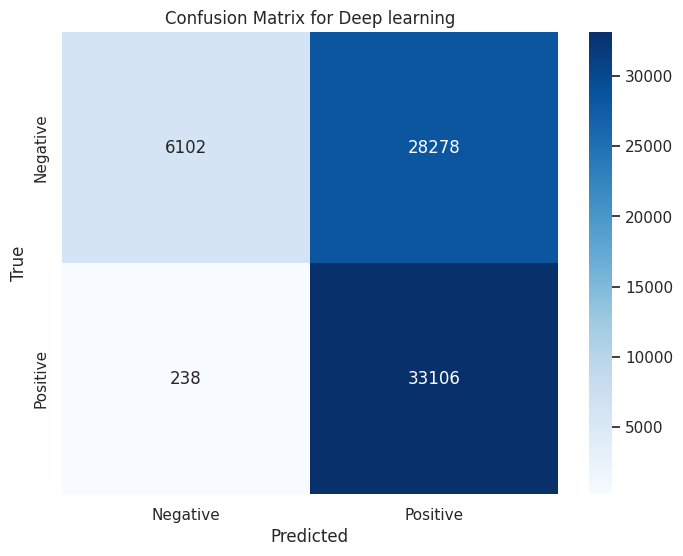

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(dnn_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Deep learning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
def compute_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics = {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    }
    return metrics

def prepare_metrics_df(metrics_dict):
    df = pd.DataFrame(metrics_dict).T
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Model'}, inplace=True)
    return df

<Figure size 1200x800 with 0 Axes>

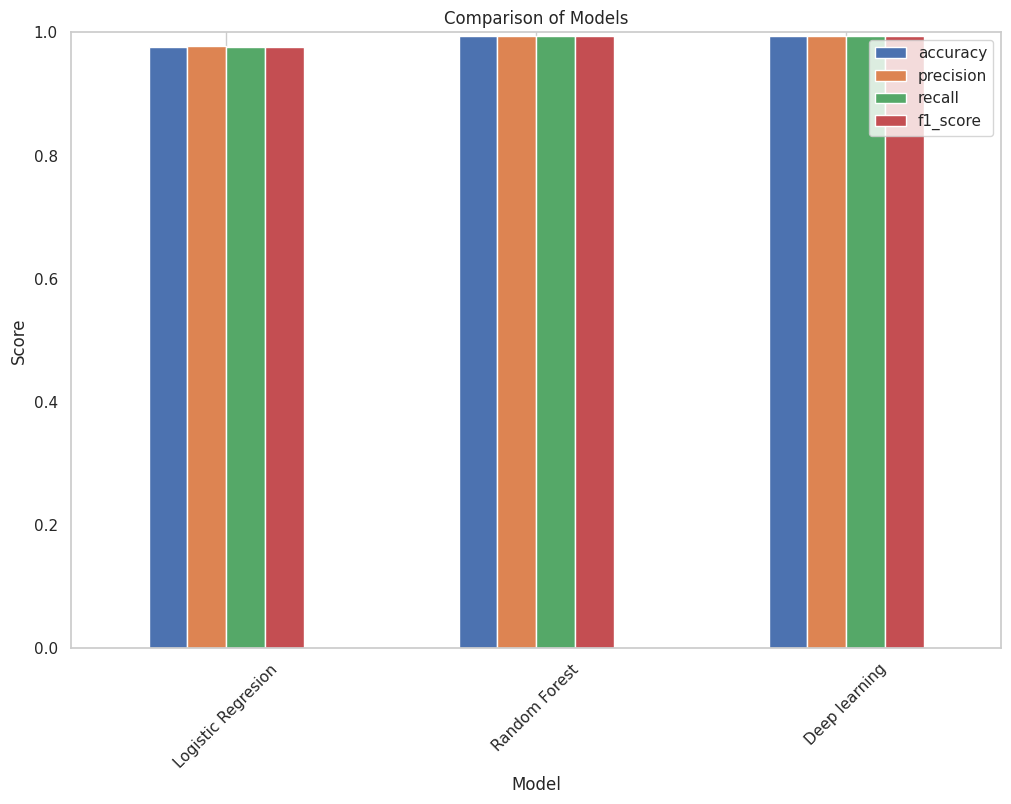

In [ ]:
y_pred_model1 = LR_y_pred
y_pred_model2 = rf_y_pred
y_pred_model3 = dnn_y_pred

# Compute metrics
metrics_model1 = compute_metrics(y_test, y_pred_model1)
metrics_model2 = compute_metrics(y_test, y_pred_model2)
metrics_model3 = compute_metrics(y_test, y_pred_model3)

# Prepare metrics for plotting
metrics_dict = {
    'Logistic Regresion': metrics_model1,
    'Random Forest': metrics_model2,
    'Deep learning': metrics_model3
}
metrics_df = prepare_metrics_df(metrics_dict)

# Plot the metrics
plt.figure(figsize=(12, 8))

# Plot Accuracy, Precision, Recall, and F1-Score
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8), rot=45)
plt.title('Comparison of Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1)  # Assuming all metrics are normalized between 0 and 1
plt.legend(loc='best')
plt.grid(axis='y')
plt.show()


## Save Model

In [ ]:
import joblib
joblib.dump(LR_pipeline, "LR_pipeline.joblib")
joblib.dump(RF_pipeline, "RF_pipeline.joblib")
# Simpan Deep Neural Network model ke format .h5 (format Keras)
dnn_model.save('deep_neural_network_model.h5')

In [ ]:
from google.colab import files

files.download('LR_pipeline.joblib')
files.download('RF_pipeline.joblib')
files.download('deep_neural_network_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = df_new[df_new['label'] == 1]
df

,Destination Port,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packets/s,Min Packet Length,PSH Flag Count,URG Flag Count,Avg Fwd Segment Size,Avg Bwd Segment Size,min_seg_size_forward,label
18883,80,0,1658,5,0,1,0,8,1658,20,1
18884,80,0,0,0,6,0,0,6,0,20,1
18885,80,0,1933,5,0,1,0,8,1933,20,1
18886,80,0,2900,0,0,0,0,7,2900,20,1
18887,80,0,1934,9,0,1,0,8,1934,20,1
...,...,...,...,...,...,...,...,...,...,...,...
197538,80,0,0,0,6,0,0,6,0,20,1
197539,80,0,1934,2946,0,1,0,8,1934,20,1
197540,80,0,0,0,6,0,0,6,0,20,1
197541,80,0,1934,4129,0,1,0,8,1934,20,1
